In [230]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [231]:
churn_data=pd.read_csv('churn_data.csv')
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [232]:
churn_data.shape

(7043, 9)

In [233]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 495.3+ KB


In [234]:
customer_data=pd.read_csv('customer_data.csv')
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [235]:
customer_data.shape


(7043, 5)

In [236]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [237]:
internet_data=pd.read_csv("internet_data.csv")
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [238]:
internet_data.shape

(7043, 9)

In [239]:
internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   MultipleLines     7043 non-null   object
 2   InternetService   7043 non-null   object
 3   OnlineSecurity    7043 non-null   object
 4   OnlineBackup      7043 non-null   object
 5   DeviceProtection  7043 non-null   object
 6   TechSupport       7043 non-null   object
 7   StreamingTV       7043 non-null   object
 8   StreamingMovies   7043 non-null   object
dtypes: object(9)
memory usage: 495.3+ KB


In [240]:
df_1=pd.merge(customer_data,internet_data,how='inner',on='customerID')

In [241]:
df_1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [242]:
df_1.shape

(7043, 13)

In [243]:
telecom=pd.merge(df_1,churn_data,how='inner',on='customerID')

In [244]:
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,...,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,...,No,No,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,...,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,...,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [245]:
telecom.shape

(7043, 21)

In [246]:
telecom.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [247]:
# let's see the info
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  tenure            7043 non-null   int64  
 14  PhoneService      7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Step 3: Data Prepration

In [248]:
#list of variables to map

varlist=['PhoneService','PaperlessBilling','Churn','Partner','Dependents']

# definig the map function

def binary_map(x):
    return x.map({'Yes':1,'No':0})

#applying the function on telecom data

telecom[varlist]=telecom[varlist].apply(binary_map)

In [249]:
telecom[varlist]

,PhoneService,PaperlessBilling,Churn,Partner,Dependents
0,0,1,0,1,0
1,1,0,0,0,0
2,1,1,1,0,0
3,0,0,0,0,0
4,1,1,1,0,0
...,...,...,...,...,...
7038,1,1,0,1,1
7039,1,1,0,1,1
7040,0,1,0,1,1
7041,1,1,1,1,0


In [250]:
telecom['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [251]:
telecom['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [252]:
telecom['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [253]:
telecom['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [254]:
telecom['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [255]:
telecom['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [256]:
telecom['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [257]:
telecom['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [258]:
# creating a dummy variables for some of the categerical variables and dropping the first one
dummy_1=pd.get_dummies(telecom[['Contract','PaymentMethod','gender','InternetService']],drop_first=True)

# adding the dummy columns to the telecom dataframe
telecom=pd.concat([telecom,dummy_1],axis=1)

In [259]:
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,Female,0,1,0,No phone service,DSL,No,Yes,No,...,29.85,0,0,0,0,1,0,0,0,0
1,5575-GNVDE,Male,0,0,0,No,DSL,Yes,No,Yes,...,1889.5,0,1,0,0,0,1,1,0,0
2,3668-QPYBK,Male,0,0,0,No,DSL,Yes,Yes,No,...,108.15,1,0,0,0,0,1,1,0,0
3,7795-CFOCW,Male,0,0,0,No phone service,DSL,Yes,No,Yes,...,1840.75,0,1,0,0,0,0,1,0,0
4,9237-HQITU,Female,0,0,0,No,Fiber optic,No,No,No,...,151.65,1,0,0,0,1,0,0,1,0


In [260]:
## creating the dummy variables for other categerical columns and dropping the level with big names.

## creating dummy for the variable 'MultipleLines'

m1=pd.get_dummies(telecom['MultipleLines'],prefix='MultipleLines')
## dropping multiplelines_no phone service column
ml1=m1.drop(['MultipleLines_No phone service'],1)
## adding the results to the master dataframe
telecom=pd.concat([telecom,ml1],axis=1)

m2=pd.get_dummies(telecom['OnlineSecurity'],prefix='OnlineSecurity')
## dropping onlinesecutrity_no phone service column
ml2=m2.drop(['OnlineSecurity_No internet service'],1)
## adding the results to the master dataframe
telecom=pd.concat([telecom,ml2],axis=1)

m3=pd.get_dummies(telecom['OnlineBackup'],prefix='OnlineBackup')
## dropping onlinebackup_no phone service column
ml3=m3.drop(['OnlineBackup_No internet service'],1)
## adding the results to the master dataframe
telecom=pd.concat([telecom,ml3],axis=1)

m4=pd.get_dummies(telecom['DeviceProtection'],prefix='DeviceProtection')
## dropping deviceprotection_no phone service column
ml4=m4.drop(['DeviceProtection_No internet service'],1)
## adding the results to the master dataframe
telecom=pd.concat([telecom,ml4],axis=1)

m5=pd.get_dummies(telecom['TechSupport'],prefix='TechSupport')
## dropping techsupport_no phone service column
ml5=m5.drop(['TechSupport_No internet service'],1)
## adding the results to the master dataframe
telecom=pd.concat([telecom,ml5],axis=1)

m6=pd.get_dummies(telecom['StreamingTV'],prefix='StreamingTV')
## dropping streamingtv_no phone service column
ml6=m6.drop(['StreamingTV_No internet service'],1)
## adding the results to the master dataframe
telecom=pd.concat([telecom,ml6],axis=1)

m7=pd.get_dummies(telecom['StreamingMovies'],prefix='StreamingMovies')
## dropping streamingmovies_no phone service column
ml7=m7.drop(['StreamingMovies_No internet service'],1)
## adding the results to the master dataframe
telecom=pd.concat([telecom,ml7],axis=1)

In [261]:
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,Female,0,1,0,No phone service,DSL,No,Yes,No,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,Male,0,0,0,No,DSL,Yes,No,Yes,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,Male,0,0,0,No,DSL,Yes,Yes,No,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,Male,0,0,0,No phone service,DSL,Yes,No,Yes,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,Female,0,0,0,No,Fiber optic,No,No,No,...,1,0,1,0,1,0,1,0,1,0


In [262]:
telecom.shape

(7043, 43)

In [263]:
# we have created the foolowing columns dummy so we can drop them

telecom=telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],1)


In [264]:
telecom.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,56.95,1889.5,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,0,0,0,2,1,1,53.85,108.15,1,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,...,1,0,1,0,1,0,1,0,1,0


In [265]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   object 
 9   Churn                                  7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [266]:
# the vaiable is imported as string we need to convert in numeric

telecom['TotalCharges']=pd.to_numeric(telecom.TotalCharges, errors='coerce')

In [267]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [268]:
## chcking the outliers in continues variables

num_telecom=telecom[['MonthlyCharges',"TotalCharges",'tenure','SeniorCitizen']]

In [269]:
num_telecom.head()

,MonthlyCharges,TotalCharges,tenure,SeniorCitizen
0,29.85,29.85,1,0
1,56.95,1889.50,34,0
2,53.85,108.15,2,0
3,42.30,1840.75,45,0
4,70.70,151.65,2,0


In [270]:
# checking outlier at 25% ,50% ,75% ,90%, 95% and 99%
num_telecom.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,MonthlyCharges,TotalCharges,tenure,SeniorCitizen
count,7043.000000,7032.000000,7043.000000,7043.000000
mean,64.761692,2283.300441,32.371149,0.162147
std,30.090047,2266.771362,24.559481,0.368612
min,18.250000,18.800000,0.000000,0.000000
25%,35.500000,401.450000,9.000000,0.000000
50%,70.350000,1397.475000,29.000000,0.000000
75%,89.850000,3794.737500,55.000000,0.000000
90%,102.600000,5976.640000,69.000000,1.000000
95%,107.400000,6923.590000,72.000000,1.000000
99%,114.729000,8039.883000,72.000000,1.000000


## from the distribution we can see that there are nooutliers,they are gardually increasing


<AxesSubplot:xlabel='SeniorCitizen'>

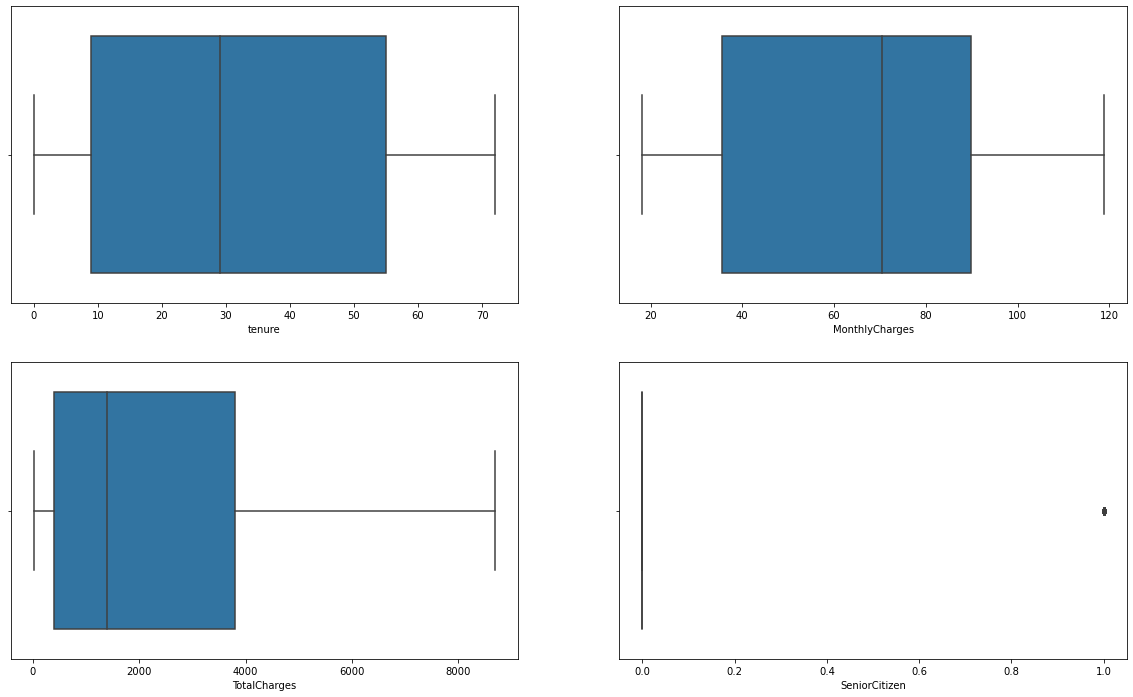

In [271]:
## visualizing catergerical columns
## Bivariate analysis(boxplot,barplot,scatterplot)
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.boxplot(x='tenure',data=telecom)

plt.subplot(2,2,2)
sns.boxplot(x="MonthlyCharges",data=telecom)

plt.subplot(2,2,3)
sns.boxplot(x='TotalCharges',data=telecom)

plt.subplot(2,2,4)
sns.boxplot(x='SeniorCitizen',data=telecom)

## Cheking missing values and imputing them

In [272]:
telecom.isnull().sum()

customerID                                0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

## it means that 11/7043 = 0.001561834 i.e 0.1% missing values are there in TotalCharges column, best is to remove these observations from the analysis¶

In [273]:
## checking the percentage of missing values

round(100*(telecom.isnull().sum()/len(telecom.index)),2)

customerID                               0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

In [274]:
## removing NaN totalcharges rows

telecom=telecom[~np.isnan(telecom['TotalCharges'])]

In [275]:
## checking the percentage of missing values

round(100*(telecom.isnull().sum()/len(telecom.index)),2)

customerID                               0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

In [276]:
from sklearn.model_selection import train_test_split

In [277]:
# putting feature variables in x

X= telecom.drop(['customerID','Churn'],axis=1)

In [278]:
X.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,0,1,0,1,0,1,29.85,29.85,0,0,...,0,1,1,0,1,0,1,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,1,0,...,1,0,0,1,1,0,1,0,1,0
2,0,0,0,2,1,1,53.85,108.15,0,0,...,0,1,1,0,1,0,1,0,1,0
3,0,0,0,45,0,0,42.30,1840.75,1,0,...,1,0,0,1,0,1,1,0,1,0
4,0,0,0,2,1,1,70.70,151.65,0,0,...,1,0,1,0,1,0,1,0,1,0


In [279]:
y = telecom['Churn']

In [280]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [281]:
# spliting the data into train and test

X_train , X_test ,y_train , y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [282]:
X_train.shape

(4922, 30)

In [283]:
y_train.shape

(4922,)

## feature scaling

In [284]:
from sklearn.preprocessing import StandardScaler

In [285]:
scaler=StandardScaler()

X_train[['tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

In [286]:
X_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0,0,0,0.019693,1,1,-0.338074,-0.276449,0,0,...,0,1,1,0,1,0,1,0,1,0
5790,0,1,1,0.305384,0,1,-0.464443,-0.112702,0,0,...,0,1,1,0,1,0,0,1,0,1
6498,0,0,0,-1.286319,1,1,0.581425,-0.974430,0,0,...,0,1,0,1,1,0,1,0,1,0
880,0,0,0,-0.919003,1,1,1.505913,-0.550676,0,0,...,0,1,0,1,0,1,0,1,0,1
2784,0,0,1,-1.163880,1,1,1.106854,-0.835971,0,0,...,1,0,0,1,0,1,0,1,0,1


In [287]:
len(telecom['Churn'])

7032

In [288]:
telecom['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [289]:
sum(telecom['Churn'])


1869

In [290]:
### Checking the Churn Rate
churn = (sum(telecom['Churn'])/len(telecom['Churn']))*100

In [291]:
churn

26.578498293515356

In [292]:
## we have almost 27% churn rate

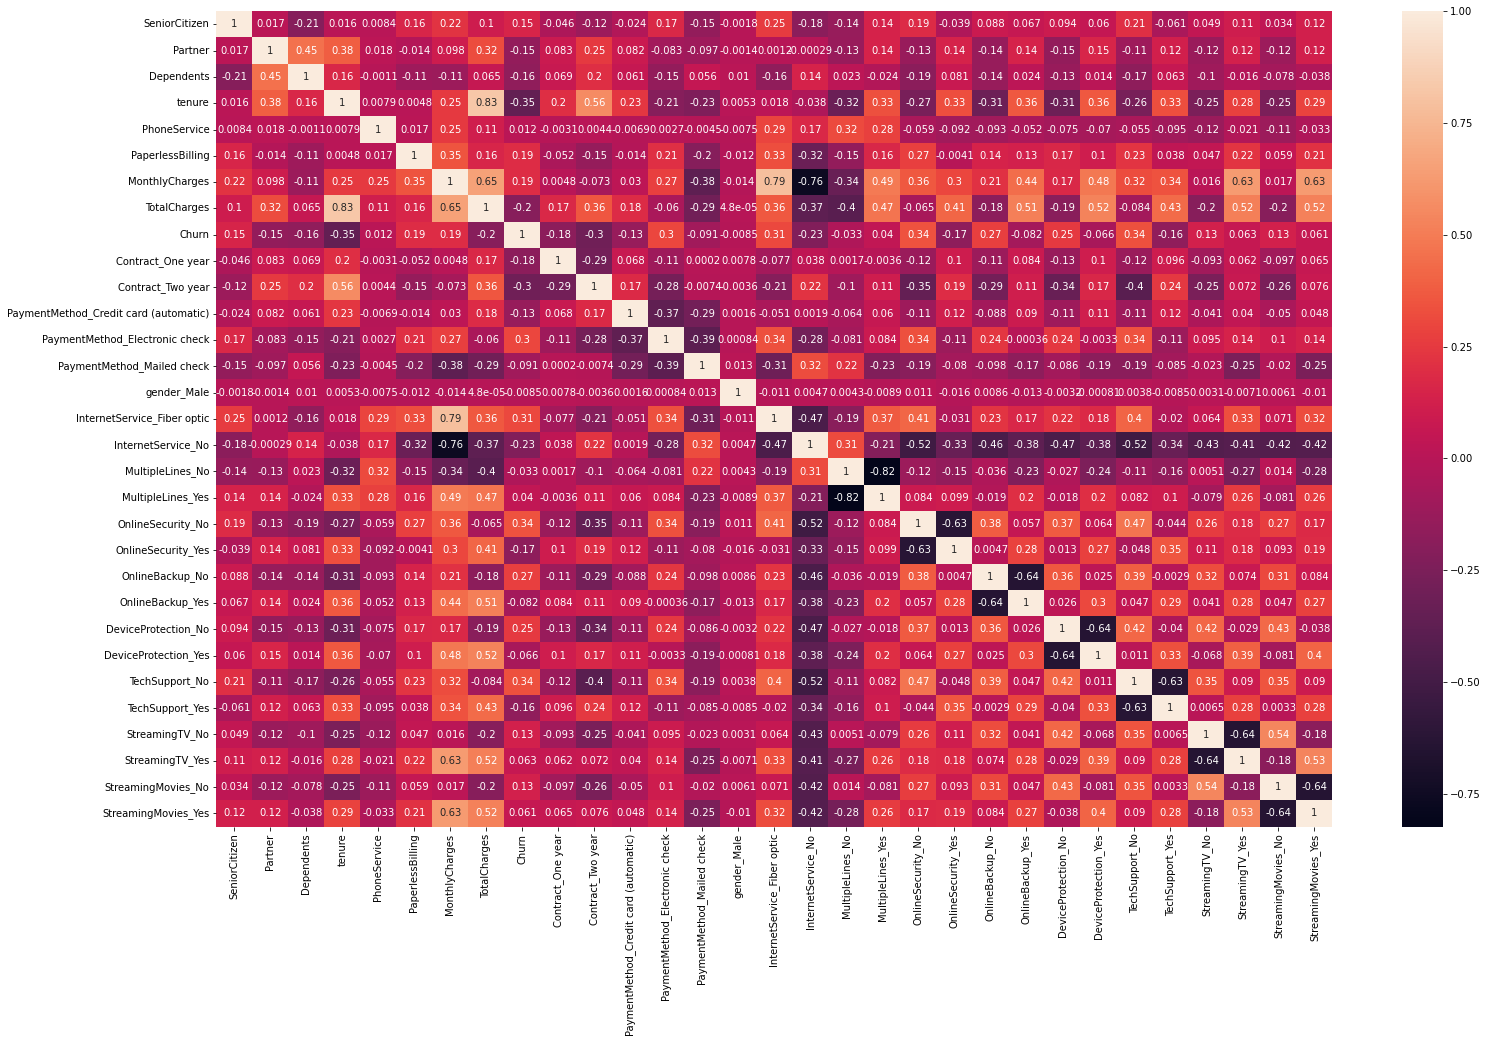

In [293]:
## plot the heatmap
plt.figure(figsize=(25,15))
sns.heatmap(telecom.corr(),annot=True)
plt.show()

## dropping highly correleated duumy variables

## If you look at the correlations between these dummy variables with their complimentary dummy variables, i.e. ‘MultipleLines_No’ with ‘MultipleLines_Yes’ or ‘OnlineSecurity_No’ with ‘OnlineSecurity_Yes’, you’ll find out they’re highly correlated.

In [294]:
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], 1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'], 1)

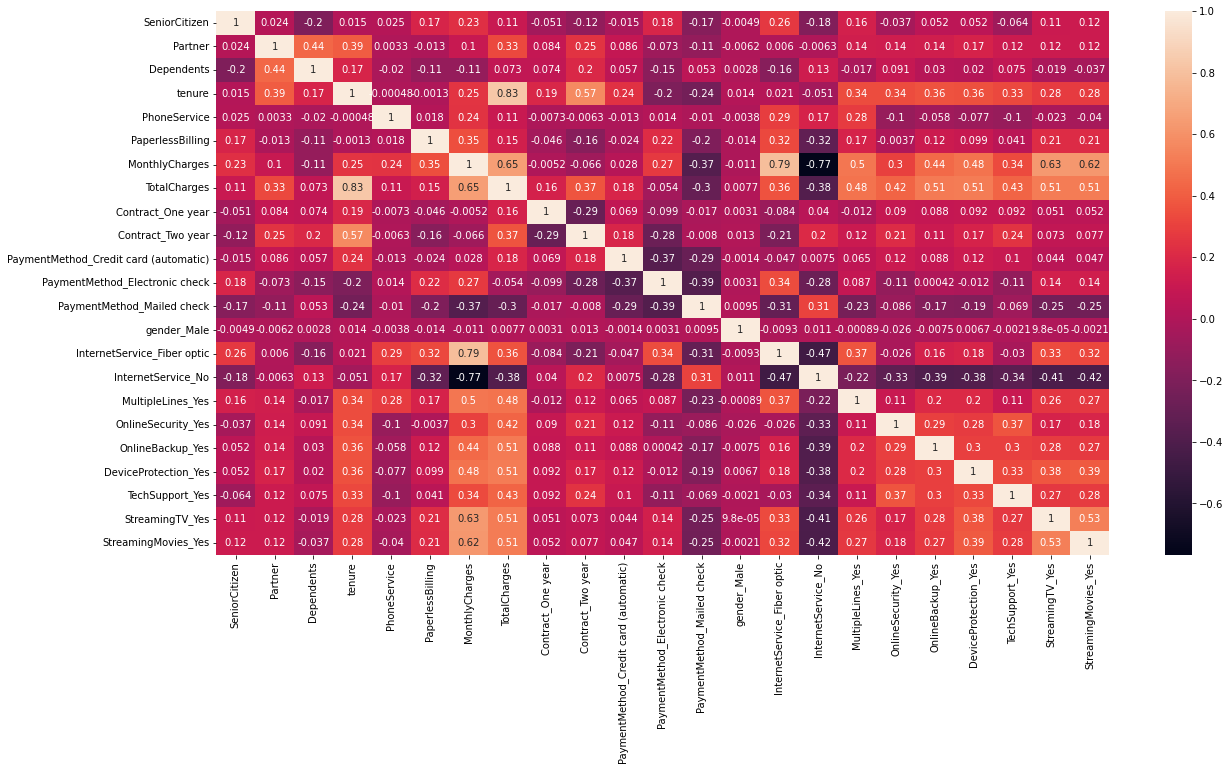

In [295]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

## Step 7: model building

In [296]:
import statsmodels.api as sm

In [297]:
## logistic regression model
logm1=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Thu, 31 Mar 2022   Deviance:                       4009.4
Time:                        23:49:43   Pearson chi2:                 6.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9382      1.546     -2.547      0.011      -6.969      -0.908
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
tenure                                   -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                              0.7332      0.198      3.705      0.000       0.345       1.121
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
=========================================================================================================
"""

## step 8 : feature scaling using RFE

In [298]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [299]:
telecom.shape

(7032, 32)

In [300]:
from sklearn.feature_selection import RFE
rfe=RFE(logreg,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [301]:
rfe.support_

array([ True, False, False,  True, False,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True, False,
       False, False,  True,  True,  True])

In [302]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('SeniorCitizen', True, 1),
 ('Partner', False, 7),
 ('Dependents', False, 6),
 ('tenure', True, 1),
 ('PhoneService', False, 3),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 4),
 ('PaymentMethod_Mailed check', True, 1),
 ('gender_Male', False, 8),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', False, 2),
 ('OnlineBackup_Yes', False, 5),
 ('DeviceProtection_Yes', False, 9),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1)]

In [303]:
col=X_train.columns[rfe.support_]

In [304]:
col

Index(['SeniorCitizen', 'tenure', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [305]:
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.1
Date:                Thu, 31 Mar 2022   Deviance:                       4022.2
Time:                        23:49:43   Pearson chi2:                 6.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.2462      0.189    -11.879      0.000      -2.617      -1.876
SeniorCitizen                             0.4296      0.100      4.312      0.000       0.234       0.625
tenure                                   -1.5596      0.187     -8.334      0.000      -1.926      -1.193
PaperlessBilling                          0.3436      0.090      3.832      0.000       0.168       0.519
MonthlyCharges                           -0.9692      0.199     -4.878      0.000      -1.359      -0.580
TotalCharges                              0.7421      0.197      3.764      0.000       0.356       1.128
Contract_One year                        -0.6830      0.128     -5.342      0.000      -0.934      -0.432
Contract_Two year                        -1.2931      0.211     -6.138      0.000      -1.706      -0.880
PaymentMethod_Credit card (automatic)    -0.3724      0.113     -3.308      0.001      -0.593      -0.152
PaymentMethod_Mailed check               -0.3723      0.111     -3.345      0.001      -0.591      -0.154
InternetService_Fiber optic               1.5865      0.216      7.342      0.000       1.163       2.010
InternetService_No                       -1.6897      0.216     -7.830      0.000      -2.113      -1.267
MultipleLines_Yes                         0.3779      0.104      3.640      0.000       0.174       0.581
TechSupport_Yes                          -0.2408      0.109     -2.210      0.027      -0.454      -0.027
StreamingTV_Yes                           0.5796      0.114      5.102      0.000       0.357       0.802
StreamingMovies_Yes                       0.4665      0.111      4.197      0.000       0.249       0.684
=========================================================================================================
"""

In [306]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

879     0.192642
5790    0.275624
6498    0.599507
880     0.513571
2784    0.648233
3874    0.414846
5387    0.431184
6623    0.801788
4465    0.228194
5364    0.504575
dtype: float64

In [307]:
y_train_pred.shape

(4922,)

In [308]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19264205, 0.27562384, 0.59950707, 0.51357126, 0.64823272,
       0.41484553, 0.43118361, 0.80178789, 0.22819404, 0.50457542])

In [309]:
y_train_pred.shape

(4922,)

## Creating a dataframe with the actual churn flag and the predicted probabilities¶

In [316]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.192642,879
1,0,0.275624,5790
2,1,0.599507,6498
3,1,0.513571,880
4,1,0.648233,2784


## Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0


In [318]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head(10)

,Churn,Churn_Prob,CustID,predicted
0,0,0.192642,879,0
1,0,0.275624,5790,0
2,1,0.599507,6498,1
3,1,0.513571,880,1
4,1,0.648233,2784,1
5,0,0.414846,3874,0
6,0,0.431184,5387,0
7,1,0.801788,6623,1
8,0,0.228194,4465,0
9,1,0.504575,5364,1


In [319]:
from sklearn import metrics

In [320]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[3275  360]
 [ 574  713]]


In [321]:
# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708


In [325]:
 #Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8102397399431126


In [326]:
# ROC CURVE
## Receiver operating Characterstic curve
# It plots the 2 parameters True positive Rate and False positive Rate
# True positive Rate(Recall) = True positive/Total actual positive = TP/(TP+FN)
# False positive Rate = False positive/Total actual negatives = FP/(TN+FP)
# AUC = area under the curve

In [327]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [328]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

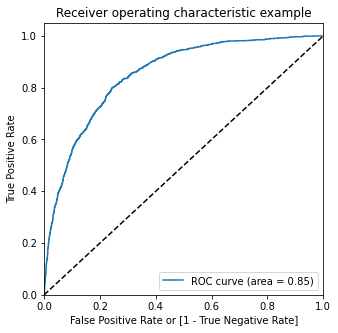

In [329]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)